In [ ]:
import pandas as pd
import geopy.distance as gd
import seaborn as sns
import plotly.express as px
import numpy as np
sns.set(rc={'figure.figsize':(15,10)})
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Adress.xlsx')
df.head()

,governorate,Region,Lat,Long
0,Al Fayyum,Al-Fayyum,29.304412,30.853546
1,Al Fayyum,Al-Fayyum,29.319696,30.835641
2,Al Fayyum,Al-Fayyum,29.308199,30.842229
3,Al Fayyum,Sinnuris,29.408575,30.865073
4,Al Fayyum,Itsa,29.236966,30.790194


In [ ]:
df.governorate.unique()

array(['Al Fayyum', 'Bani Suwayf', 'Al Buhayrah', 'Al Gharbiyah',
       'Al Minya', 'Al Minufiyah', 'Ash Sharqiyah', 'Ad Daqahliyah',
       'Al Wadi al Jadid', 'Al Iskandariyah', 'Matrouh', 'Asyut', 'Aswan',
       'Al Qahirah', 'Al Jizah', 'Al Qalyubiyah', 'Dumyat',
       'Kafr ash Shaykh', 'Al Isma`iliyah', 'Al Uqsur', 'Qina',
       "Shamal Sina'", 'Bur Sa`id', 'Al Bahr al Ahmar', 'Suhaj',
       "Janub Sina'", 'As Suways'], dtype=object)

In [ ]:
Faym = df[df['governorate'] == 'Al Fayyum']

# Manual way

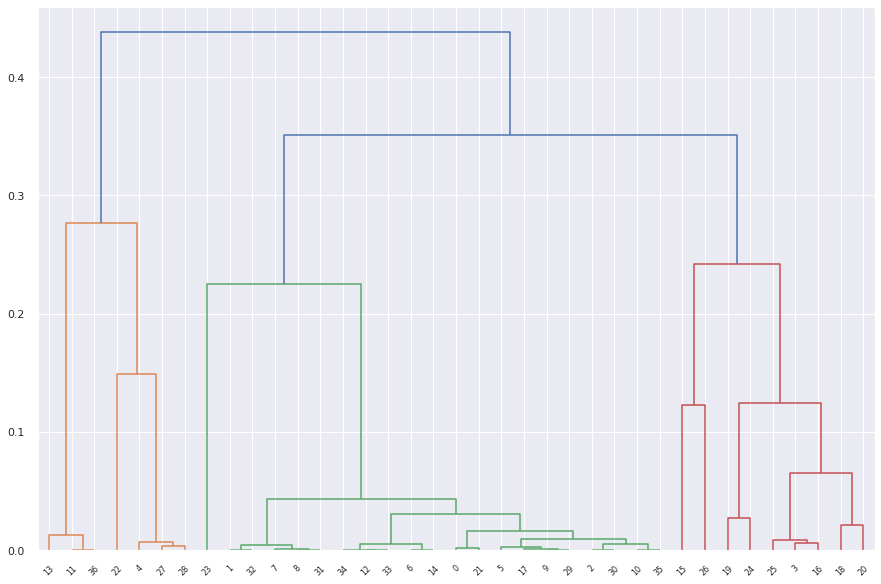

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(Faym[['Lat', 'Long']],method='ward'))

In [ ]:
model = KMeans(n_clusters=9)
clusters = model.fit_predict(Faym[['Lat', 'Long']])
Faym['clusters'] = clusters
Faym.head()

,governorate,Region,Lat,Long,clusters
0,Al Fayyum,Al-Fayyum,29.304412,30.853546,1
1,Al Fayyum,Al-Fayyum,29.319696,30.835641,1
2,Al Fayyum,Al-Fayyum,29.308199,30.842229,1
3,Al Fayyum,Sinnuris,29.408575,30.865073,3
4,Al Fayyum,Itsa,29.236966,30.790194,4


In [ ]:
fig = px.scatter(x='Long', y='Lat',color='clusters', symbol='Region', data_frame=Faym, height=800, width=1200)
# fig.update_traces(marker_size=10)
fig.show()

# DBSCAN

In [ ]:
X = Faym[['Lat', 'Long']]

In [ ]:
range_eps = list(np.geomspace(0.0001, 0.001, 100))
eps = []
scores = []
for i in range_eps:
    eps.append(i)
    db = DBSCAN(eps=i, min_samples=1).fit(X)
    score = silhouette_score(X, db.labels_, metric='euclidean')
    scores.append(score)

In [ ]:
max(scores)

0.4580830458481573

In [ ]:
db = DBSCAN(eps=eps[scores.index(max(scores))], min_samples=1).fit(Faym[['Lat', 'Long']])

In [ ]:
Faym['class'] = db.labels_

In [ ]:
fig = px.scatter(x='Long', y='Lat',color='class', data_frame=Faym, height=800, width=1200)
fig.show()

# Agglomerative

In [ ]:
df_new = df.sort_values(by=['governorate']).reset_index().drop('index', axis=1)

In [ ]:
df_new

,governorate,Region,Lat,Long
0,Ad Daqahliyah,Al-Mansurah 2_x000D_\n,31.031552,31.393273
1,Ad Daqahliyah,Al-Mansurah 2_x000D_\n,31.033861,31.395167
2,Ad Daqahliyah,Al-Mansurah 2_x000D_\n,31.033786,31.395132
3,Ad Daqahliyah,Al-Mansurah 1,31.042824,31.378390
4,Ad Daqahliyah,Al-Mansurah 1,31.040754,31.381102
...,...,...,...,...
4270,Suhaj,Jirja,26.313319,31.852796
4271,Suhaj,Al-Manshah,26.410579,31.762381
4272,Suhaj,Akhmim,26.445654,31.828533
4273,Suhaj,Tima,26.904892,31.436368


In [ ]:
max_class = 0
all_class = []
for gov in df_new.governorate.unique():
  df_gov = df_new[df_new.governorate == gov]
  model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=0.1)
  clusters = model.fit_predict(df_gov[['Lat', 'Long']])
  max_c = max(clusters)
  all_class.append(clusters+max_class)
  max_class += (max_c+1)

In [ ]:
for i in all_class:
  print(min(i), '--', max(i))

0 -- 32
33 -- 55
56 -- 82
83 -- 91
92 -- 104
105 -- 127
128 -- 137
138 -- 174
175 -- 194
195 -- 209
210 -- 256
257 -- 271
272 -- 277
278 -- 282
283 -- 290
291 -- 321
322 -- 334
335 -- 345
346 -- 356
357 -- 359
360 -- 368
369 -- 383
384 -- 397
398 -- 403
404 -- 419
420 -- 422
423 -- 440


In [ ]:
all_class

[array([ 6,  6,  6,  4,  4,  4, 14, 24,  6,  7, 20, 17, 20, 19,  0,  3, 23,
        15, 27, 10, 24, 29, 31,  6,  2,  4,  6,  6, 32, 24, 10,  4,  4, 15,
        19,  7,  0,  6, 17,  0, 10,  4, 11, 27, 24, 29, 31,  5, 17,  4, 23,
         1, 12, 19, 19,  4, 17,  4,  0,  9, 19,  4,  6, 31, 30, 20, 18, 15,
        15, 29,  3, 29, 19, 13, 27, 27,  0,  0,  0,  4,  6,  4,  6,  4, 29,
        15, 11,  6, 32,  6, 21,  6,  6, 11,  0,  4, 32,  3, 12,  4,  4, 27,
        10, 13, 12,  5,  0,  2, 28,  2,  2,  1,  6, 24,  6,  4, 24,  1,  4,
         5,  7, 17,  4,  7,  4,  4, 10, 14,  6, 12,  2, 11,  6,  6,  3,  6,
         3,  4,  6, 20, 18, 25,  2, 28, 28, 20, 24,  4,  6,  4,  9,  6,  6,
        12, 11,  1,  2,  2, 12, 11, 11, 17, 17, 31, 23, 31, 23, 10, 10, 19,
        19, 19,  9, 12,  5,  6, 28, 30, 32, 27, 17,  1, 24, 17,  9,  4, 14,
        31, 32,  5, 19, 32,  0,  6,  6,  5,  8,  4, 10, 26, 19,  6, 12, 14,
        18,  9, 32,  6, 16, 26,  0,  0,  3,  6,  4, 13,  9, 20, 20, 15, 22,
        23, 

In [ ]:
clusters = []
for i in all_class:
  for j in i:
    clusters.append(j)

In [ ]:
clusters

[6,
 6,
 6,
 4,
 4,
 4,
 14,
 24,
 6,
 7,
 20,
 17,
 20,
 19,
 0,
 3,
 23,
 15,
 27,
 10,
 24,
 29,
 31,
 6,
 2,
 4,
 6,
 6,
 32,
 24,
 10,
 4,
 4,
 15,
 19,
 7,
 0,
 6,
 17,
 0,
 10,
 4,
 11,
 27,
 24,
 29,
 31,
 5,
 17,
 4,
 23,
 1,
 12,
 19,
 19,
 4,
 17,
 4,
 0,
 9,
 19,
 4,
 6,
 31,
 30,
 20,
 18,
 15,
 15,
 29,
 3,
 29,
 19,
 13,
 27,
 27,
 0,
 0,
 0,
 4,
 6,
 4,
 6,
 4,
 29,
 15,
 11,
 6,
 32,
 6,
 21,
 6,
 6,
 11,
 0,
 4,
 32,
 3,
 12,
 4,
 4,
 27,
 10,
 13,
 12,
 5,
 0,
 2,
 28,
 2,
 2,
 1,
 6,
 24,
 6,
 4,
 24,
 1,
 4,
 5,
 7,
 17,
 4,
 7,
 4,
 4,
 10,
 14,
 6,
 12,
 2,
 11,
 6,
 6,
 3,
 6,
 3,
 4,
 6,
 20,
 18,
 25,
 2,
 28,
 28,
 20,
 24,
 4,
 6,
 4,
 9,
 6,
 6,
 12,
 11,
 1,
 2,
 2,
 12,
 11,
 11,
 17,
 17,
 31,
 23,
 31,
 23,
 10,
 10,
 19,
 19,
 19,
 9,
 12,
 5,
 6,
 28,
 30,
 32,
 27,
 17,
 1,
 24,
 17,
 9,
 4,
 14,
 31,
 32,
 5,
 19,
 32,
 0,
 6,
 6,
 5,
 8,
 4,
 10,
 26,
 19,
 6,
 12,
 14,
 18,
 9,
 32,
 6,
 16,
 26,
 0,
 0,
 3,
 6,
 4,
 13,
 9,
 20,
 20,
 15,
 22,
 2

In [ ]:
df_new['class'] = clusters

# Al-Fayyum

In [ ]:
faym = df_new[df_new.governorate == 'Al Fayyum']

In [ ]:
fig = px.scatter(x='Long', y='Lat',color='class',symbol='Region', data_frame=faym, height=800, width=1200)
fig.show()

# Alex

In [ ]:
alex = df_new[df_new.governorate == 'Al Iskandariyah']

In [ ]:
fig = px.scatter(x='Long', y='Lat',color='class',symbol='Region', data_frame=alex, height=800, width=1200)
fig.show()

# Get centroid of clustes

In [ ]:
# center of each cluster
cluster_centers = df_new.groupby('class').mean()

In [ ]:
cluster_centers.head()

,Lat,Long
class,,
0,31.185606,31.525233
1,30.748791,31.351308
2,30.645039,31.322312
3,31.077802,31.584609
4,31.040576,31.367727


# Get location

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")
for i in range(len(cluster_centers)):
    lat = cluster_centers['Lat'][i]
    long = cluster_centers['Long'][i]
    location = geolocator.reverse(str(lat)+","+str(long), language='en')
    tmp=str(location).split(',')
    if (len(tmp)<=3):
        name = tmp[0]
    else:
        name = tmp[len(tmp)-1-3]
    cluster_centers.loc[i, 'Region'] = name

GeocoderTimedOut: ignored

In [ ]:
cluster_centers.head(10)

## Download files

In [ ]:
# for algo
cluster_centers.to_csv('algo.csv', index=False)

In [ ]:
# all data with clusters
df_new.to_csv('ATMs.csv', index=False)